In [59]:
import numpy as np 
import scipy as sp 
import IPython 
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

IPython version: 7.8.0
scikit-learn version: 0.23.1


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [6]:
# show the keys in the dataset 
print("Keys of iris_dataset: \n{}". format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
# print the first part of the dataset description
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [9]:
# show the target names
print("iris target names: {}".format(iris_dataset["target_names"]))

iris target names: ['setosa' 'versicolor' 'virginica']


In [12]:
# show the feature names
print("iris feature names: \n{}".format(iris_dataset["feature_names"]))

iris feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
# split the data 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [21]:
# check the first 5 rows of train
X_train[:5]

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3]])

In [43]:
X_train.shape

(112, 4)

In [60]:
X_test.shape

(38, 4)

In [22]:
# convert the features array to dataframe for visualization
X_train_df = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])
X_train_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


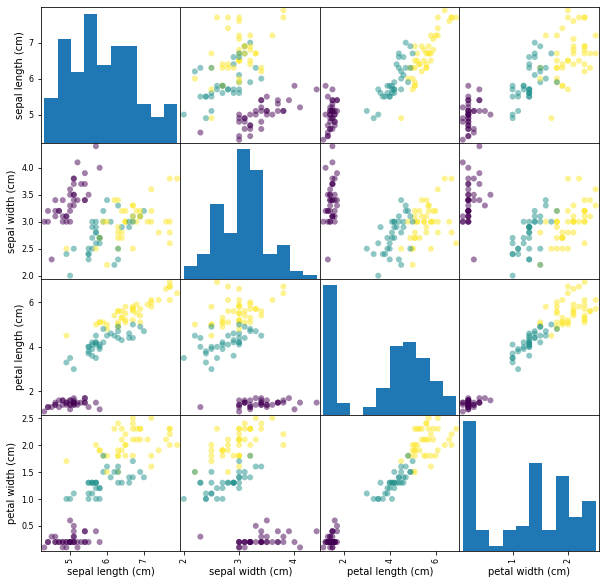

In [63]:
pd.plotting.scatter_matrix (X_train_df, c=y_train, figsize=(10,10),
                           marker='o')
plt.show()

In [36]:
y_train[:5]

array([1, 1, 2, 0, 2])

In [41]:
# using k-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [42]:
# apply knn to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
# new measurement to be predicted 
X_new = np.array([[5, 2.9, 1, 0.2]])

In [49]:
prediction = knn.predict(X_new)
prediction 

array([0])

In [55]:
iris_dataset['target_names'][prediction]

array(['setosa'], dtype='<U10')

In [56]:
# model evaluation
y_pred = knn.predict(X_test)
y_pred 

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [57]:
iris_dataset['target_names'][y_pred]

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype='<U10')

In [67]:
# check the prediction accuracy
print('Test set score: {:.2f}'.format(knn.score(X_test, y_test)))

Test set score: 0.97
